# Predicting Hourly Bike Rentals
Using a few different machine learning models, we will predict the number of bike rentals for a given hour. The efficacy of each model will be measured using Mean Squared Error. 
  
The dataset can be downloaded from [The University of California, Irvine's site](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). Hadi Fanaee-T at the University of Porto compiled this data into a CSV file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

df = pd.read_csv('bike_rental_hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


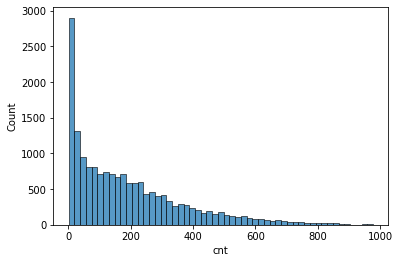

In [2]:
sns.histplot(df['cnt']);

In [3]:
def assign_time_labels(t):
    if t > 20 or t < 5:
        return 4
    elif 5 <= t <= 11:
        return 1
    elif 11 < t <= 16:
        return 2
    else:
        return 3
    
df['daypart'] = df['hr'].apply(assign_time_labels) 

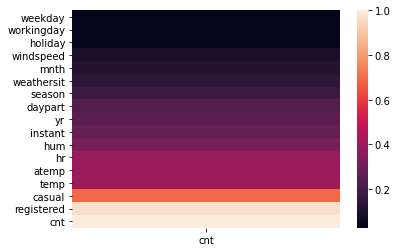

In [4]:
corrs = abs(df.corr()[['cnt']])
corrs = corrs.sort_values('cnt')
sns.heatmap(corrs);

In [5]:
train = df.sample(frac=.8, random_state=5)
test = df.loc[~df.index.isin(train.index)]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, roc_auc_score
import numpy as np

In [7]:
feature_cols = ['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'temp', 'atemp', 'windspeed', 'daypart']

In [8]:
def lr_train_test(train, test, features, target):
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    predictions = lr.predict(test[features])
    error_metric = mean_squared_error(test[target], predictions)
    return error_metric

In [9]:
linear_reg1 = lr_train_test(train, test, feature_cols, 'cnt')
print('Linear Regression Model Error [mean squared error]:')
print(linear_reg1)

Linear Regression Model Error [mean squared error]:
18298.82716758464


In [10]:
def d_tree(train, test, features, target, m_sample_leaf=12, *args, **kwargs):
    tree = DecisionTreeRegressor(min_samples_leaf=m_sample_leaf, random_state=5280, **kwargs)
    tree.fit(train[features], train[target])
    predictions = tree.predict(test[features])
    error_metric1 = mean_squared_error(test[target], predictions)
    predictions = tree.predict(train[features])
    error_metric2 = mean_squared_error(train[target], predictions)
    return error_metric1, error_metric2  

In [11]:
print('Decision Tree Regressor Model Error [mean squared error]:')
test_error, train_error = d_tree(train, test, feature_cols, 'cnt')
print(test_error)
# print('Train Error:', train_error)
# print('difference:', test_error - train_error)

Decision Tree Regressor Model Error [mean squared error]:
3223.5041744896275


In [12]:
def random_forest(train, test, features, target, n_est=100, *args, **kwargs):
    forest = RandomForestRegressor(n_estimators=n_est, random_state=5280, **kwargs)
    forest.fit(train[features], train[target])
    predictions = forest.predict(test[features])
    error_metric = mean_squared_error(test[target], predictions)
    return error_metric

In [13]:
forestreg = random_forest(train, test, feature_cols, 'cnt', min_samples_leaf=2)
print('Random Forest Model Error [mean squared error]:')
print(forestreg)

Random Forest Model Error [mean squared error]:
2428.654958336745


In [14]:
print('Linear Regression Model:', linear_reg1)
print('Decision Tree Model:     ', test_error)
print('Random Forest Model:     ', forestreg)

Linear Regression Model: 18298.82716758464
Decision Tree Model:      3223.5041744896275
Random Forest Model:      2428.654958336745


## Bike Rental Predictions Results Recap
The Random Forest and Decision Tree Models drastically outperformed the Linear Regression Model.  
The Random Forest was a little more accurate than the Decision Tree--and did not overfit the training set.